In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')
pd.set_option('display.max_rows', None)

import time
import re
import folium
import warnings
warnings.filterwarnings('ignore')

# Data Load

In [184]:
import os

path = 'C:/Users/seob6/Desktop/개인프로젝트/SafeProject/data/'
files = os.listdir(path)
df = pd.DataFrame()

def data_load():
    global df
    for i in files:
        data = pd.read_csv(path + i, encoding='cp949')
        df = pd.concat([df, data])

data_load()
print(df.shape)
print(len(files))
df.head()

(17248, 13)
191


,민방위대피시설명,민방위대피시설구분,소재지도로명주소,소재지지번주소,위도,경도,민방위대피시설면적,대피가능인원수,개방여부,평시활용유형,관리기관전화번호,관리기관명,데이터기준일자
0,신화 아파트,공공용,"강원도 강릉시 강변로 270 (노암동, 신화아파트)",강원도 강릉시 노암동 711,37.749336,128.898263,9543.0,11567.0,Y,지하주차장,033-660-3931,강릉시 강남동주민센터,2021-06-07
1,양우내안애 아파트,공공용,"강원도 강릉시 강변로 328-8 (노암동, 양우내안애아파트)",강원도 강릉시 노암동 844,37.752135,128.903876,11517.0,13960.0,Y,주차장,033-660-3931,강릉시 강남동주민센터,2021-06-07
2,남산현대 아파트(노암동),공공용,"강원도 강릉시 남부로125번길 11 (노암동, 남산현대아파트)",강원도 강릉시 노암동 610,37.742658,128.892244,3877.0,4699.0,Y,지하주차장,033-660-3931,강릉시 강남동주민센터,2021-06-07
3,고합로얄아파트,공공용,"강원도 강릉시 남부로125번길 23 (노암동, 고합아파트)",강원도 강릉시 노암동 618-17,37.743668,128.892772,1074.0,1301.0,Y,지하주차장,033-660-3931,강릉시 강남동주민센터,2021-06-07
4,노암한라1차 아파트,공공용,"강원도 강릉시 노암길42번길 28 (노암동, 노암한라1차아파트)",강원도 강릉시 노암동 390,37.744589,128.901228,3371.0,4086.0,Y,지하주차장,033-660-3931,강릉시 강남동주민센터,2021-06-07


# 데이터 확인

전체 데이터가 들어왔는지 체크

In [185]:
df_seoul = df.loc[df['소재지도로명주소'].str.contains('서울특별시', na=False)]
df_gy = df.loc[df['소재지도로명주소'].str.contains('경기도', na=False)]
print(f"관리기관명: 서울특별시 : {df_seoul['관리기관명'].nunique()}")
print(f"관리기관명: 경기도 : {df_gy['관리기관명'].nunique()}")
print(df_seoul['관리기관명'].unique(), end='\n\n')
print(df_gy['관리기관명'].unique())

관리기관명: 서울특별시 : 169
관리기관명: 경기도 : 208
['가평군' '서울특별시 강남구청' '강동구청' '서울특별시 강북구청' '서울특별시 강서구청' '서울특별시 관악구청'
 '서울특별시 광진구청' '서울특별시 구로구 오류1동주민센터' '서울특별시 구로구 오류2동주민센터' '서울특별시 구로구항동주민센터'
 '서울특별시 구로구 수궁동주민센터' '서울특별시 구로구 구로5동주민센터' '서울특별시 구로구 개봉1동주민센터'
 '서울특별시 구로구 개봉2동주민센터' '서울특별시 구로구 개봉3동주민센터' '서울특별시 구로구 고척1동주민센터'
 '서울특별시 구로구 고척2동주민센터' '서울특별시 구로구 구로3동주민센터' '서울특별시 구로구 구로4동주민센터'
 '서울특별시 구로구 신도림동주민센터' '서울특별시 구로구 가리봉동주민센터' '서울특별시 구로구 구로1동주민센터'
 '서울특별시 구로구 구로2동주민센터' '서울특별시 구로구 항동주민센터' '금천구청' '하계1동' '중계본동' '상계5동'
 '하계2동' '상계8동' '상계9동' '중계2,3동' '상계10동' '상계2동' '월계1동' '상계1동' '월계3동' '중계4동'
 '상계6.7동' '공릉1동' '월계2동' '공릉2동' '상계3.4동' '중계1동' '서울특별시 도봉구청'
 '서울특별시 동대문구 답십리1동' '서울특별시 동대문구 답십리2동' '서울특별시 동대문구 용신동' '서울특별시 동대문구 이문1동'
 '서울특별시 동대문구 이문2동' '서울특별시 동대문구 장안1동' '서울특별시 동대문구 장안2동' '서울특별시 동대문구 전농1동'
 '서울특별시 동대문구 전농2동' '서울특별시 동대문구 제기동' '서울특별시 동대문구 청량리동' '서울특별시 동대문구 회기동'
 '서울특별시 동대문구 휘경1동' '서울특별시 동대문구 휘경2동' '서울특별시 동작구청' '마포구청' '서울특별시 서대문구청'
 '왕십리2동주민센터' '마장동주민센터' '사근동주민센터' '행당1동주민센터' '성수1가1동주민센터' '성수1가2동주민센터'
 '성수2가1

# EDA

In [186]:
df.head()

,민방위대피시설명,민방위대피시설구분,소재지도로명주소,소재지지번주소,위도,경도,민방위대피시설면적,대피가능인원수,개방여부,평시활용유형,관리기관전화번호,관리기관명,데이터기준일자
0,신화 아파트,공공용,"강원도 강릉시 강변로 270 (노암동, 신화아파트)",강원도 강릉시 노암동 711,37.749336,128.898263,9543.0,11567.0,Y,지하주차장,033-660-3931,강릉시 강남동주민센터,2021-06-07
1,양우내안애 아파트,공공용,"강원도 강릉시 강변로 328-8 (노암동, 양우내안애아파트)",강원도 강릉시 노암동 844,37.752135,128.903876,11517.0,13960.0,Y,주차장,033-660-3931,강릉시 강남동주민센터,2021-06-07
2,남산현대 아파트(노암동),공공용,"강원도 강릉시 남부로125번길 11 (노암동, 남산현대아파트)",강원도 강릉시 노암동 610,37.742658,128.892244,3877.0,4699.0,Y,지하주차장,033-660-3931,강릉시 강남동주민센터,2021-06-07
3,고합로얄아파트,공공용,"강원도 강릉시 남부로125번길 23 (노암동, 고합아파트)",강원도 강릉시 노암동 618-17,37.743668,128.892772,1074.0,1301.0,Y,지하주차장,033-660-3931,강릉시 강남동주민센터,2021-06-07
4,노암한라1차 아파트,공공용,"강원도 강릉시 노암길42번길 28 (노암동, 노암한라1차아파트)",강원도 강릉시 노암동 390,37.744589,128.901228,3371.0,4086.0,Y,지하주차장,033-660-3931,강릉시 강남동주민센터,2021-06-07


In [187]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17248 entries, 0 to 52
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   민방위대피시설명   17248 non-null  object 
 1   민방위대피시설구분  17248 non-null  object 
 2   소재지도로명주소   17097 non-null  object 
 3   소재지지번주소    14177 non-null  object 
 4   위도         17231 non-null  float64
 5   경도         17231 non-null  float64
 6   민방위대피시설면적  17248 non-null  float64
 7   대피가능인원수    17248 non-null  object 
 8   개방여부       17248 non-null  object 
 9   평시활용유형     13781 non-null  object 
 10  관리기관전화번호   14447 non-null  object 
 11  관리기관명      17248 non-null  object 
 12  데이터기준일자    17248 non-null  object 
dtypes: float64(3), object(10)
memory usage: 1.8+ MB


In [188]:
# 대피가능인원수 object -> float형으로 

def convert_int(col):
    if pd.isnull(col):
        return np.nan
    elif col == '.':
        return np.nan
    else:
        return float(col)

df['대피가능인원수'] = df['대피가능인원수'].apply(convert_int)   

## 시 단위로 보기 위해 새로운 테이블 만들기 (1차 region)

In [189]:
df.head()

,민방위대피시설명,민방위대피시설구분,소재지도로명주소,소재지지번주소,위도,경도,민방위대피시설면적,대피가능인원수,개방여부,평시활용유형,관리기관전화번호,관리기관명,데이터기준일자
0,신화 아파트,공공용,"강원도 강릉시 강변로 270 (노암동, 신화아파트)",강원도 강릉시 노암동 711,37.749336,128.898263,9543.0,11567.0,Y,지하주차장,033-660-3931,강릉시 강남동주민센터,2021-06-07
1,양우내안애 아파트,공공용,"강원도 강릉시 강변로 328-8 (노암동, 양우내안애아파트)",강원도 강릉시 노암동 844,37.752135,128.903876,11517.0,13960.0,Y,주차장,033-660-3931,강릉시 강남동주민센터,2021-06-07
2,남산현대 아파트(노암동),공공용,"강원도 강릉시 남부로125번길 11 (노암동, 남산현대아파트)",강원도 강릉시 노암동 610,37.742658,128.892244,3877.0,4699.0,Y,지하주차장,033-660-3931,강릉시 강남동주민센터,2021-06-07
3,고합로얄아파트,공공용,"강원도 강릉시 남부로125번길 23 (노암동, 고합아파트)",강원도 강릉시 노암동 618-17,37.743668,128.892772,1074.0,1301.0,Y,지하주차장,033-660-3931,강릉시 강남동주민센터,2021-06-07
4,노암한라1차 아파트,공공용,"강원도 강릉시 노암길42번길 28 (노암동, 노암한라1차아파트)",강원도 강릉시 노암동 390,37.744589,128.901228,3371.0,4086.0,Y,지하주차장,033-660-3931,강릉시 강남동주민센터,2021-06-07


* 관리기관명 대신 소재지도로명주소 활용!

In [190]:
df.isnull().sum()

민방위대피시설명        0
민방위대피시설구분       0
소재지도로명주소      151
소재지지번주소      3071
위도             17
경도             17
민방위대피시설면적       0
대피가능인원수         1
개방여부            0
평시활용유형       3467
관리기관전화번호     2801
관리기관명           0
데이터기준일자         0
dtype: int64

In [191]:
def region_group(row):
    if pd.isnull(row):
        return np.nan
    else:
        return row.split(' ')[0]

df['region'] = df['소재지도로명주소'].apply(region_group)
df.isnull().sum()

민방위대피시설명        0
민방위대피시설구분       0
소재지도로명주소      151
소재지지번주소      3071
위도             17
경도             17
민방위대피시설면적       0
대피가능인원수         1
개방여부            0
평시활용유형       3467
관리기관전화번호     2801
관리기관명           0
데이터기준일자         0
region        151
dtype: int64

In [200]:
df.loc[df['region'].isnull(), 'region'] = df.loc[df['region'].isnull(), '소재지지번주소'].str.split().str[0]
df.loc[df['region']=='-', 'region'] = df.loc[df['region'].isnull(), '소재지지번주소'].str.split().str[0]

In [204]:
df.loc[df['region'].str.contains('경기도?', regex=False), 'region'] = df.loc[df['region'].str.contains('경기도?', regex=False), 'region'] = '경기도'
df.loc[df['region'].str.contains('경기도?', regex=False)]


,민방위대피시설명,민방위대피시설구분,소재지도로명주소,소재지지번주소,위도,경도,민방위대피시설면적,대피가능인원수,개방여부,평시활용유형,관리기관전화번호,관리기관명,데이터기준일자,region


In [221]:
sum(df.region.isnull())

0

In [222]:
# 지역명 간소화
df['region'] = df['region'].str.replace('전라남도', '전남', regex=False).replace('경상남도', '경남').replace('경상북도', '경북').replace('전라북도', '전남').replace('충청북도', '충북').replace('충청남도', '충남')

,민방위대피시설명
region,
경기도,3153
서울특별시,2790
전남,2571
경남,1838
부산광역시,1262
울산광역시,908
대구광역시,724
인천광역시,675
경북,629


<AxesSubplot:ylabel='region'>

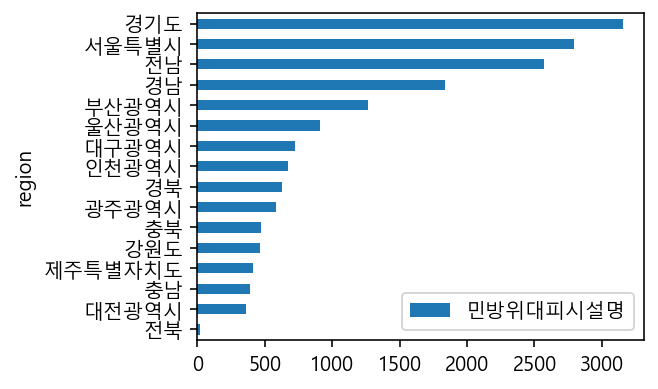

In [230]:
region_table = df.pivot_table(index='region',
                            values='민방위대피시설명',
                            aggfunc='count').sort_values(by='민방위대피시설명', ascending=False)
display(region_table)
# sns.barplot(data=region_table, x=region_table.index, y='민방위대피시설명')
region_table.sort_values(by='민방위대피시설명', ascending=True).plot(kind='barh', figsize=(4, 3))

In [231]:
# 개방여부
display(df['개방여부'].value_counts())

def convert_yn(row):
    if pd.isnull(row):
        return np.nan
    else:
        return row.replace('y', 'Y').replace('n', 'N')

df['개방여부'] = df['개방여부'].apply(convert_yn)
display(df['개방여부'].value_counts())

Y    16166
N      556
y      525
n        1
Name: 개방여부, dtype: int64

Y    16691
N      557
Name: 개방여부, dtype: int64

<AxesSubplot:>

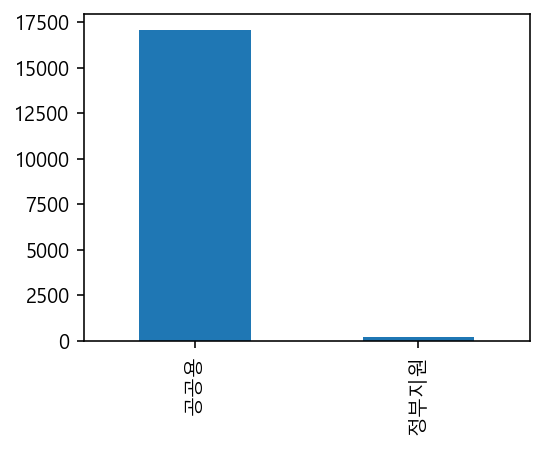

In [232]:
# 민방위대피시설구분
df['민방위대피시설구분'].value_counts().plot.bar(figsize=(4, 3))

In [235]:
# 중간저장
df.to_csv('./total.csv', index=False)

In [236]:
df.head()

,민방위대피시설명,민방위대피시설구분,소재지도로명주소,소재지지번주소,위도,경도,민방위대피시설면적,대피가능인원수,개방여부,평시활용유형,관리기관전화번호,관리기관명,데이터기준일자,region
0,신화 아파트,공공용,"강원도 강릉시 강변로 270 (노암동, 신화아파트)",강원도 강릉시 노암동 711,37.749336,128.898263,9543.0,11567.0,Y,지하주차장,033-660-3931,강릉시 강남동주민센터,2021-06-07,강원도
1,양우내안애 아파트,공공용,"강원도 강릉시 강변로 328-8 (노암동, 양우내안애아파트)",강원도 강릉시 노암동 844,37.752135,128.903876,11517.0,13960.0,Y,주차장,033-660-3931,강릉시 강남동주민센터,2021-06-07,강원도
2,남산현대 아파트(노암동),공공용,"강원도 강릉시 남부로125번길 11 (노암동, 남산현대아파트)",강원도 강릉시 노암동 610,37.742658,128.892244,3877.0,4699.0,Y,지하주차장,033-660-3931,강릉시 강남동주민센터,2021-06-07,강원도
3,고합로얄아파트,공공용,"강원도 강릉시 남부로125번길 23 (노암동, 고합아파트)",강원도 강릉시 노암동 618-17,37.743668,128.892772,1074.0,1301.0,Y,지하주차장,033-660-3931,강릉시 강남동주민센터,2021-06-07,강원도
4,노암한라1차 아파트,공공용,"강원도 강릉시 노암길42번길 28 (노암동, 노암한라1차아파트)",강원도 강릉시 노암동 390,37.744589,128.901228,3371.0,4086.0,Y,지하주차장,033-660-3931,강릉시 강남동주민센터,2021-06-07,강원도


In [303]:
data = df.copy()
data.rename(columns={'민방위대피시설명':'facility', '민방위대피시설구분':'cate', '소재지도로명주소':'addr_load', '소재지지번주소':'addr_num', '위도': 'lat', '경도':'long', '민방위대피시설면적':'area',
'대피가능인원수':'capacity', '개방여부':'openOrnot', '평시활용유형':'normal_use', '관리기관전화번호':'manage_phone', '관리기관명':'management', '데이터기준일자':'date'}, inplace=True)
data.head()

,facility,cate,addr_load,addr_num,lat,long,area,capacity,openOrnot,normal_use,manage_phone,management,date,region
0,신화 아파트,공공용,"강원도 강릉시 강변로 270 (노암동, 신화아파트)",강원도 강릉시 노암동 711,37.749336,128.898263,9543.0,11567.0,Y,지하주차장,033-660-3931,강릉시 강남동주민센터,2021-06-07,강원도
1,양우내안애 아파트,공공용,"강원도 강릉시 강변로 328-8 (노암동, 양우내안애아파트)",강원도 강릉시 노암동 844,37.752135,128.903876,11517.0,13960.0,Y,주차장,033-660-3931,강릉시 강남동주민센터,2021-06-07,강원도
2,남산현대 아파트(노암동),공공용,"강원도 강릉시 남부로125번길 11 (노암동, 남산현대아파트)",강원도 강릉시 노암동 610,37.742658,128.892244,3877.0,4699.0,Y,지하주차장,033-660-3931,강릉시 강남동주민센터,2021-06-07,강원도
3,고합로얄아파트,공공용,"강원도 강릉시 남부로125번길 23 (노암동, 고합아파트)",강원도 강릉시 노암동 618-17,37.743668,128.892772,1074.0,1301.0,Y,지하주차장,033-660-3931,강릉시 강남동주민센터,2021-06-07,강원도
4,노암한라1차 아파트,공공용,"강원도 강릉시 노암길42번길 28 (노암동, 노암한라1차아파트)",강원도 강릉시 노암동 390,37.744589,128.901228,3371.0,4086.0,Y,지하주차장,033-660-3931,강릉시 강남동주민센터,2021-06-07,강원도


In [240]:
data.to_csv('./data.csv', index=False)

In [304]:
data.head()

,facility,cate,addr_load,addr_num,lat,long,area,capacity,openOrnot,normal_use,manage_phone,management,date,region
0,신화 아파트,공공용,"강원도 강릉시 강변로 270 (노암동, 신화아파트)",강원도 강릉시 노암동 711,37.749336,128.898263,9543.0,11567.0,Y,지하주차장,033-660-3931,강릉시 강남동주민센터,2021-06-07,강원도
1,양우내안애 아파트,공공용,"강원도 강릉시 강변로 328-8 (노암동, 양우내안애아파트)",강원도 강릉시 노암동 844,37.752135,128.903876,11517.0,13960.0,Y,주차장,033-660-3931,강릉시 강남동주민센터,2021-06-07,강원도
2,남산현대 아파트(노암동),공공용,"강원도 강릉시 남부로125번길 11 (노암동, 남산현대아파트)",강원도 강릉시 노암동 610,37.742658,128.892244,3877.0,4699.0,Y,지하주차장,033-660-3931,강릉시 강남동주민센터,2021-06-07,강원도
3,고합로얄아파트,공공용,"강원도 강릉시 남부로125번길 23 (노암동, 고합아파트)",강원도 강릉시 노암동 618-17,37.743668,128.892772,1074.0,1301.0,Y,지하주차장,033-660-3931,강릉시 강남동주민센터,2021-06-07,강원도
4,노암한라1차 아파트,공공용,"강원도 강릉시 노암길42번길 28 (노암동, 노암한라1차아파트)",강원도 강릉시 노암동 390,37.744589,128.901228,3371.0,4086.0,Y,지하주차장,033-660-3931,강릉시 강남동주민센터,2021-06-07,강원도


In [305]:
data['region'].value_counts()

경기도        3153
서울특별시      2790
전남         2571
경남         1838
부산광역시      1262
울산광역시       908
대구광역시       724
인천광역시       675
경북          629
광주광역시       586
충북          468
강원도         462
제주특별자치도     416
충남          389
대전광역시       359
전북           18
Name: region, dtype: int64

In [312]:
len(data.loc[data['openOrnot']=='N'])

557

## 서울

In [306]:
seoul = data.loc[data['region']=='서울특별시']
seoul.head()

,facility,cate,addr_load,addr_num,lat,long,area,capacity,openOrnot,normal_use,manage_phone,management,date,region
0,신사지하철역,공공용,"서울특별시 강남구 도산대로 지하 102 (신사동, 신사역)",서울특별시 강남구 신사동 667,37.516431,127.020329,3730.0,4521.0,Y,지하철승강장,NaN,서울특별시 강남구청,2021-08-09,서울특별시
1,현대백화점,공공용,서울특별시 강남구 압구정로 165 (현대백화점본점),서울특별시 강남구 압구정동 429,37.527327,127.027427,8844.0,10720.0,Y,주차장,NaN,서울특별시 강남구청,2021-08-09,서울특별시
2,신사동주민센터,공공용,"서울특별시 강남구 압구정로 128 (신사동, 신사동주민센터)",서울특별시 강남구 신사동 548-1,37.523974,127.022797,66.0,80.0,Y,기계실,NaN,서울특별시 강남구청,2021-08-09,서울특별시
3,신구초등학교 복합화시설,공공용,"서울특별시 강남구 압구정로18길 28 (신사동, 신구초등학교)",서울특별시 강남구 신사동 550-11,37.523361,127.023991,4964.0,6017.0,Y,주차장,NaN,서울특별시 강남구청,2021-08-09,서울특별시
4,광림교회 사회봉사관,공공용,"서울특별시 강남구 논현로163길 33 (신사동, 교회)",서울특별시 강남구 신사동 568-2,37.523894,127.025580,12027.0,14578.0,Y,주차장,NaN,서울특별시 강남구청,2021-08-09,서울특별시


In [307]:
seoul.loc[seoul['addr_load'].isnull()]

,facility,cate,addr_load,addr_num,lat,long,area,capacity,openOrnot,normal_use,manage_phone,management,date,region
34,태성빌딩,공공용,NaN,서울특별시 강남구 청담동 91-8,37.523972,127.042789,479.0,581.0,Y,주차장,NaN,서울특별시 강남구청,2021-08-09,서울특별시
35,현대아파트 201동,공공용,NaN,서울특별시 강남구 청담동 23,37.521839,127.041358,828.0,1004.0,Y,주차장,NaN,서울특별시 강남구청,2021-08-09,서울특별시
36,경원오피스텔,공공용,NaN,서울특별시 강남구 청담동 5,37.523593,127.045065,4679.0,5672.0,Y,주차장,NaN,서울특별시 강남구청,2021-08-09,서울특별시
37,인성빌딩,공공용,NaN,서울특별시 강남구 청담동 88-37,37.524373,127.041029,574.0,696.0,Y,주차장,NaN,서울특별시 강남구청,2021-08-09,서울특별시
38,M빌딩,공공용,NaN,서울특별시 강남구 청담동 97,37.524336,127.044789,1198.0,1452.0,Y,주차장,NaN,서울특별시 강남구청,2021-08-09,서울특별시
39,금하빌딩,공공용,NaN,서울특별시 강남구 청담동 41-2,37.517640,127.041672,14203.0,17216.0,Y,주차장,NaN,서울특별시 강남구청,2021-08-09,서울특별시
40,청담1문화센터,공공용,NaN,서울특별시 강남구 청담동 124-1,37.525091,127.049292,264.0,320.0,Y,주차장,NaN,서울특별시 강남구청,2021-08-09,서울특별시
41,화천회관,공공용,NaN,서울특별시 강남구 청담동 133-3,37.520481,127.057578,3452.0,4184.0,Y,주차장,NaN,서울특별시 강남구청,2021-08-09,서울특별시
42,호텔리베라,공공용,NaN,서울특별시 강남구 청담동 53-7,37.523827,127.054241,2376.0,2880.0,Y,주차장,NaN,서울특별시 강남구청,2021-08-09,서울특별시
43,프리마호텔,공공용,NaN,서울특별시 강남구 청담동 52-3,37.524332,127.052283,3323.0,4028.0,Y,주차장,NaN,서울특별시 강남구청,2021-08-09,서울특별시


In [308]:
# addr_load의 2번째 단어를 region2에 넣기
# addr_load가 null이면 addr_num의 2번째 단어를 region2에 넣기
seoul['region2'] = np.nan

def region2(row):
    if ~(pd.isnull(row)) & (row != '-'):
        return row.split(' ')[1]
    else:
        return np.nan

seoul['region2'] = seoul['addr_load'].apply(region2)
print(seoul['region2'].isnull().sum())
display(seoul.head())

29


,facility,cate,addr_load,addr_num,lat,long,area,capacity,openOrnot,normal_use,manage_phone,management,date,region,region2
0,신사지하철역,공공용,"서울특별시 강남구 도산대로 지하 102 (신사동, 신사역)",서울특별시 강남구 신사동 667,37.516431,127.020329,3730.0,4521.0,Y,지하철승강장,NaN,서울특별시 강남구청,2021-08-09,서울특별시,강남구
1,현대백화점,공공용,서울특별시 강남구 압구정로 165 (현대백화점본점),서울특별시 강남구 압구정동 429,37.527327,127.027427,8844.0,10720.0,Y,주차장,NaN,서울특별시 강남구청,2021-08-09,서울특별시,강남구
2,신사동주민센터,공공용,"서울특별시 강남구 압구정로 128 (신사동, 신사동주민센터)",서울특별시 강남구 신사동 548-1,37.523974,127.022797,66.0,80.0,Y,기계실,NaN,서울특별시 강남구청,2021-08-09,서울특별시,강남구
3,신구초등학교 복합화시설,공공용,"서울특별시 강남구 압구정로18길 28 (신사동, 신구초등학교)",서울특별시 강남구 신사동 550-11,37.523361,127.023991,4964.0,6017.0,Y,주차장,NaN,서울특별시 강남구청,2021-08-09,서울특별시,강남구
4,광림교회 사회봉사관,공공용,"서울특별시 강남구 논현로163길 33 (신사동, 교회)",서울특별시 강남구 신사동 568-2,37.523894,127.025580,12027.0,14578.0,Y,주차장,NaN,서울특별시 강남구청,2021-08-09,서울특별시,강남구


In [309]:
seoul.loc[seoul['addr_load'].isnull(), 'region2'] = seoul.loc[seoul['addr_load'].isnull(), 'addr_num'].str.split().str[1]
seoul.loc[seoul['addr_load']=='-', 'region2'] = seoul.loc[seoul['addr_load']=='-', 'addr_num'].str.split().str[1]
print(seoul['region2'].isnull().sum())

0


In [310]:
seoul.to_csv('./seoul.csv', index=False)